In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df_consumer = pd.read_excel('./data/U of M Student Data - Consumer Discretionary .xlsx', 
                           skiprows=7)

In [3]:
# overview of the data
df_consumer.head(3)

,Company Name,Exchange:Ticker,Industry Classifications,Company Type,Geographic Locations,"Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)","Total Revenue [LTM] ($USDmm, Historical rate)","EBITDA [LTM] ($USDmm, Historical rate)",EBITDA Margin % [LTM],TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x),...,"Total Revenues, 3 Yr CAGR % [LTM] (%)","EBITDA, 3 Yr CAGR % [LTM] (%)","Total Revenues, 5 Yr CAGR % [LTM] (%)","EBITDA, 5 Yr CAGR % [LTM] (%)",Return on Assets % [LTM],Return on Equity % [LTM],Capex as % of Revenues [Latest Annual] (%),EBITDA / Interest Exp. [LTM],Total Debt/Capital % [Latest Annual],Total Debt/Equity % [Latest Annual]
0,"1-800-FLOWERS.COM, Inc. (NasdaqGS:FLWS)",NasdaqGS:FLWS,Consumer Discretionary (Primary),Public Company,United States of America (Primary),927.6,1189.0,78.90,6.64,0.784,...,16.4,19.4,11.2,18.7,4.6,9.9,2.89,12.7,32.6,48.5
1,A.H. Belo Corporation (NYSE:AHC),NYSE:AHC,Consumer Discretionary (Primary),Public Company,United States of America (Primary),61.9,267.0,5.92,2.22,0.232,...,-4.04,-34.5,-10.6,-28.9,-1.57,-12.2,2.78,-,-,-
2,"Aaron's, Inc. (NYSE:AAN)",NYSE:AAN,Consumer Discretionary (Primary),Public Company,United States of America (Primary),2461.3,3234.0,462.80,14.30,0.761,...,13,9.6,10.3,11.2,9.93,9.95,1.9,19.1,30.9,44.7


In [8]:
df_consumer.replace('-', np.NaN, inplace=True)
df_consumer.replace('NM', np.NaN, inplace=True)
print 'excel sheet shape: ', df_consumer.shape
print 'columns name: ', df_consumer.columns.tolist()

excel sheet shape:  (513, 25)
columns name:  [u'Company Name', u'Exchange:Ticker', u'Industry Classifications', u'Company Type', u'Geographic Locations', u'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)', u'Total Revenue [LTM] ($USDmm, Historical rate)', u'EBITDA [LTM] ($USDmm, Historical rate)', u'EBITDA Margin % [LTM]', u'TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x)', u'TEV/LTM EBITDA [My Setting] [LTM as of 12/31/2016] (x)', u'Est. Annual Revenue Growth - 1 Yr % - Capital IQ [Latest] (%)', u'Est. Annual EBITDA Growth - 1 Yr % - Capital IQ [Latest] (%)', u'Total Revenues, 1 Yr Growth % [LTM] (%)', u'EBITDA, 1 Yr Growth % [LTM] (%)', u'Total Revenues, 3 Yr CAGR % [LTM] (%)', u'EBITDA, 3 Yr CAGR % [LTM] (%)', u'Total Revenues, 5 Yr CAGR % [LTM] (%)', u'EBITDA, 5 Yr CAGR % [LTM] (%)', u'Return on Assets % [LTM]', u'Return on Equity % [LTM]', u'Capex as % of Revenues [Latest Annual] (%)', u'EBITDA / Interest Exp. [LTM]', u'Total Debt/Capital 

In [9]:
# brief overview of each column's information
i = 0
for col in df_consumer.columns:
    print 'feature name: ', col
    print 'data type: ', df_consumer[col].dtype
    print 'proportional of NA value', np.sum(df_consumer[col].isnull())/float(df_consumer.shape[0])
    if df_consumer[col].dtype != 'object':
        i += 1
    print 
print 'number of numeric columns', i

feature name:  Company Name
data type:  object
proportional of NA value 0.0

feature name:  Exchange:Ticker
data type:  object
proportional of NA value 0.0

feature name:  Industry Classifications
data type:  object
proportional of NA value 0.0

feature name:  Company Type
data type:  object
proportional of NA value 0.0

feature name:  Geographic Locations
data type:  object
proportional of NA value 0.0

feature name:  Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)
data type:  float64
proportional of NA value 0.0272904483431

feature name:  Total Revenue [LTM] ($USDmm, Historical rate)
data type:  float64
proportional of NA value 0.0

feature name:  EBITDA [LTM] ($USDmm, Historical rate)
data type:  float64
proportional of NA value 0.0

feature name:  EBITDA Margin % [LTM]
data type:  float64
proportional of NA value 0.0

feature name:  TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x)
data type:  float64
proportional of NA value 0.0

feature na

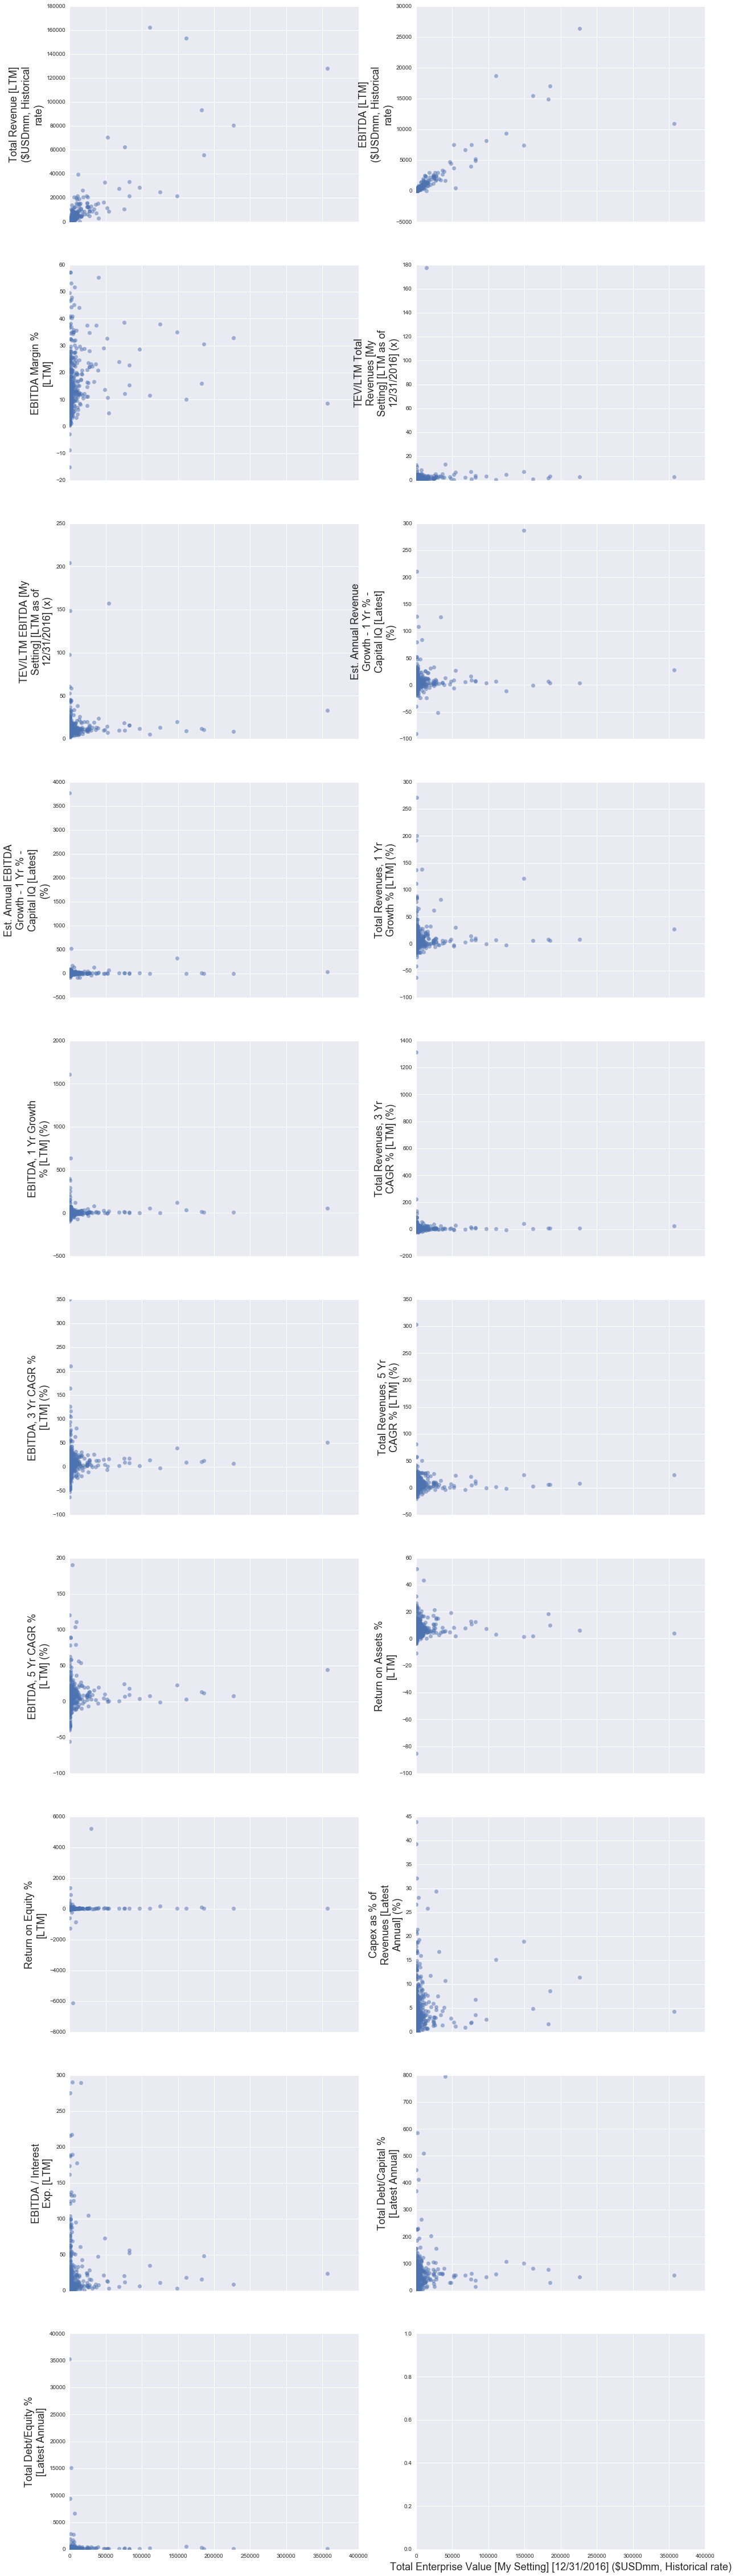

In [34]:
# plot the relationship between 
# 'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)' and other
# numerical features
import textwrap
target_col = 'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)'
index = ~df_consumer[target_col].isnull()
fig, ax = plt.subplots(10,2, sharex=True, figsize=(20, 80))
a = ax.flatten()
i = 0
for col in df_consumer.columns:
    if df_consumer[col].dtype != 'object' and col != target_col:
        a[i].plot(df_consumer[target_col], df_consumer[col], 'o', alpha=0.5)
        a[i].set_ylabel('\n'.join(textwrap.wrap(col, 20)), fontsize=18)
        i += 1
plt.xlabel(target_col, fontsize=18, ha='center')
fig.savefig('consumer_scatter_plot.png')